In [115]:
from datastructures import all_vars_from_incidence
from representations import generate_label
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from anytree import Node, PreOrderIter, RenderTree

In [39]:
incstr = {
    'f_0': ('x','y'),   
    'f_1': ('a','c','y'),    # analysis f1(c, y)
    'f_2': ('a','b'),    # analysis f2(a)
    'r_1': ('b','d'),     # function 
    'f_3': ('e','c', 'b')
         }

In [51]:
solvefor = {
    'f_0': 'y',   # should not be c, given that solvefor for r1 is c
    'f_1': 'a',
    'f_2': 'b',
    'f_3': 'e',    # should not be c, given that solvefor for r1 is c
    'r_1': 'c' #(? when not assigned) # for 'diagonalized' DSM should be 'd'
    # note also that 'c' has to be an input upstream of 'r1', but if r1 is under a solver, then 'c' can not be an output of any node outside
}

In [71]:
# only leafs are explicit
root = Node('.')
f0 = Node('f_0', parent=root)
s1 = Node('.', parent=root)
f3 = Node('f_3', parent=root)
f1 = Node('f_1', parent=s1)
f2 = Node('f_2', parent=s1)
r1 = Node('r_1', end=True, parent=s1)

In [65]:
sequence = incstr.keys() # default
sequence = ['f_0','f_1','f_2','r_1','f_3']

In [110]:
def getpatchwindow(lst):
    ulcorner = lst[0]
    size = max(lst)-ulcorner+1
    return ulcorner,size

In [111]:
allpatches = []
for node in PreOrderIter(root):
    if not node.is_leaf: #to speed things up a bit
        patchparam = getpatchwindow([idx for idx,elt in enumerate(sequence) if elt in 
                                     [n.name for n in node.children]])
        allpatches.append(patchparam)

In [66]:
permutation = list(all_vars_from_incidence(incstr)) # default
permutation = ['a','b','c','d','e','x','y'] # user specified
sequence_based_permutation = [solvefor[eqname] for eqname in sequence]  # option that shows outputs
permutation = sequence_based_permutation + [var for var in permutation if var not in sequence_based_permutation]

In [67]:
A = np.zeros((len(sequence), len(permutation)))
for idx, eq in enumerate(sequence):
    varsineq = list(incstr[eq])
    for var in varsineq:
        col = permutation.index(var)
        color = 0.5 if idx == col else 1.
        A[idx,col] = color

In [135]:
tree_labels = {node.name: (r"{}${}$".format(pre, node.name)) for pre, _, node in RenderTree(root)}

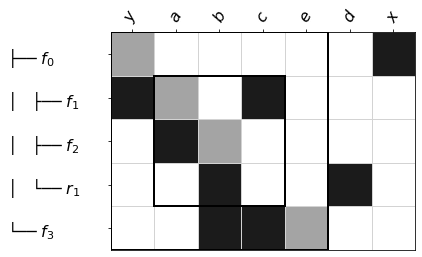

In [138]:
fig = plt.pcolormesh(A, cmap='Greys', edgecolors='lightgray', linewidth=1, vmin=0, vmax=1.1)
fontsize=16
permute_labels = [generate_label(elt) for elt in permutation]
xtickidx, xtags = zip(*enumerate(permute_labels))
plt.xticks(np.array(xtickidx)+0.5,xtags, rotation = 60, fontsize=fontsize)
sequence_labels = [tree_labels[elt] for elt in sequence]
ytickidx, ytags = zip(*enumerate(sequence_labels))
plt.yticks(np.array(ytickidx)+0.5,ytags, fontsize=fontsize, ha = 'left')
ax.xaxis.tick_top()
#neqs = len(sequence)
ax = plt.gca()
for ulcorner, size in allpatches:
    rect = patches.Rectangle((ulcorner,ulcorner), size, size, linewidth=2, edgecolor='k', facecolor='none')
    ax.add_patch(rect)
ax.invert_yaxis()
ax.xaxis.tick_top()
yax = ax.get_yaxis()
yax.set_tick_params(pad=100)
ax.set_aspect('equal');
plt.savefig('figures/nested_sm.png', dpi=600, bbox_inches='tight')